<a href="https://colab.research.google.com/github/yadukrishnanp2001/Predicting-Stock-Price-using-RNN-LSTM-and-GRU/blob/main/RNN%2CLSTM%26GRU_24015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
df = pd.read_csv('/content/TCS.csv', thousands=',', parse_dates=['Date'])
df

,Symbol,Series,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,Turnover₹,No.ofTrades
0,TCS,EQ,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+10,-
1,TCS,EQ,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+09,-
2,TCS,EQ,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+09,-
3,TCS,EQ,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+09,-
4,TCS,EQ,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+09,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,TCS,EQ,2023-12-22,3787.50,3800.00,3845.95,3762.00,3814.00,3824.00,3805.11,2413058,9.181962e+09,"2,10,826"
4795,TCS,EQ,2023-12-26,3824.00,3819.85,3834.00,3790.15,3798.10,3795.55,3806.25,1285231,4.891912e+09,"1,05,834"
4796,TCS,EQ,2023-12-27,3795.55,3799.00,3818.20,3768.00,3808.00,3811.20,3792.62,1293976,4.907556e+09,"1,35,647"
4797,TCS,EQ,2023-12-28,3811.20,3824.00,3838.00,3792.10,3796.15,3799.90,3811.22,1682889,6.413856e+09,"1,33,761"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Symbol               4799 non-null   object        
 1   Series               4799 non-null   object        
 2   Date                 4799 non-null   datetime64[ns]
 3   PrevClose            4799 non-null   float64       
 4   OpenPrice            4799 non-null   float64       
 5   HighPrice            4799 non-null   float64       
 6   LowPrice             4799 non-null   float64       
 7   LastPrice            4799 non-null   float64       
 8   ClosePrice           4799 non-null   float64       
 9   AveragePrice         4799 non-null   float64       
 10  TotalTradedQuantity  4799 non-null   int64         
 11  Turnover₹            4799 non-null   float64       
 12  No.ofTrades          4799 non-null   object        
dtypes: datetime64[ns](1), float64(8),

In [ ]:
df = df.drop(['Symbol', 'Series'], axis=1)
df

,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,Turnover₹,No.ofTrades
0,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+10,-
1,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+09,-
2,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+09,-
3,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+09,-
4,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+09,-
...,...,...,...,...,...,...,...,...,...,...,...
4794,2023-12-22,3787.50,3800.00,3845.95,3762.00,3814.00,3824.00,3805.11,2413058,9.181962e+09,"2,10,826"
4795,2023-12-26,3824.00,3819.85,3834.00,3790.15,3798.10,3795.55,3806.25,1285231,4.891912e+09,"1,05,834"
4796,2023-12-27,3795.55,3799.00,3818.20,3768.00,3808.00,3811.20,3792.62,1293976,4.907556e+09,"1,35,647"
4797,2023-12-28,3811.20,3824.00,3838.00,3792.10,3796.15,3799.90,3811.22,1682889,6.413856e+09,"1,33,761"


In [ ]:
df['No.ofTrades'] = df['No.ofTrades'].str.replace('-', '')
df['No.ofTrades'] = df['No.ofTrades'].str.replace(',', '')

In [ ]:
df['No.ofTrades'] = pd.to_numeric(df['No.ofTrades'], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4799 non-null   datetime64[ns]
 1   PrevClose            4799 non-null   float64       
 2   OpenPrice            4799 non-null   float64       
 3   HighPrice            4799 non-null   float64       
 4   LowPrice             4799 non-null   float64       
 5   LastPrice            4799 non-null   float64       
 6   ClosePrice           4799 non-null   float64       
 7   AveragePrice         4799 non-null   float64       
 8   TotalTradedQuantity  4799 non-null   int64         
 9   Turnover₹            4799 non-null   float64       
 10  No.ofTrades          3116 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 412.5 KB


<ipython-input-61-a5dc5ff7c802>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['No.ofTrades'] = pd.to_numeric(df['No.ofTrades'], errors='ignore')


In [ ]:
df = df.sort_values('Date')
df

,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,Turnover₹,No.ofTrades
0,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+10,NaN
1,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+09,NaN
2,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+09,NaN
3,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+09,NaN
4,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4794,2023-12-22,3787.50,3800.00,3845.95,3762.00,3814.00,3824.00,3805.11,2413058,9.181962e+09,210826.0
4795,2023-12-26,3824.00,3819.85,3834.00,3790.15,3798.10,3795.55,3806.25,1285231,4.891912e+09,105834.0
4796,2023-12-27,3795.55,3799.00,3818.20,3768.00,3808.00,3811.20,3792.62,1293976,4.907556e+09,135647.0
4797,2023-12-28,3811.20,3824.00,3838.00,3792.10,3796.15,3799.90,3811.22,1682889,6.413856e+09,133761.0


In [ ]:
df.isna().sum()

,0
Date,0
PrevClose,0
OpenPrice,0
HighPrice,0
LowPrice,0
LastPrice,0
ClosePrice,0
AveragePrice,0
TotalTradedQuantity,0
Turnover₹,0


In [ ]:
df['No.ofTrades'] = df['No.ofTrades'].fillna(df['No.ofTrades'].mode()[0])
df.isna().sum()

,0
Date,0
PrevClose,0
OpenPrice,0
HighPrice,0
LowPrice,0
LastPrice,0
ClosePrice,0
AveragePrice,0
TotalTradedQuantity,0
Turnover₹,0


In [ ]:
df

,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,Turnover₹,No.ofTrades
0,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+10,32093.0
1,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+09,32093.0
2,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+09,32093.0
3,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+09,32093.0
4,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+09,32093.0
...,...,...,...,...,...,...,...,...,...,...,...
4794,2023-12-22,3787.50,3800.00,3845.95,3762.00,3814.00,3824.00,3805.11,2413058,9.181962e+09,210826.0
4795,2023-12-26,3824.00,3819.85,3834.00,3790.15,3798.10,3795.55,3806.25,1285231,4.891912e+09,105834.0
4796,2023-12-27,3795.55,3799.00,3818.20,3768.00,3808.00,3811.20,3792.62,1293976,4.907556e+09,135647.0
4797,2023-12-28,3811.20,3824.00,3838.00,3792.10,3796.15,3799.90,3811.22,1682889,6.413856e+09,133761.0


In [ ]:
# Select multiple features
features = ['PrevClose' , 'OpenPrice', 'HighPrice', 'LowPrice', 'LastPrice' ,'ClosePrice', 'AveragePrice' ,'TotalTradedQuantity','Turnover₹']
data = df[features].copy()
data


,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,Turnover₹
0,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+10
1,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+09
2,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+09
3,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+09
4,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+09
...,...,...,...,...,...,...,...,...,...
4794,3787.50,3800.00,3845.95,3762.00,3814.00,3824.00,3805.11,2413058,9.181962e+09
4795,3824.00,3819.85,3834.00,3790.15,3798.10,3795.55,3806.25,1285231,4.891912e+09
4796,3795.55,3799.00,3818.20,3768.00,3808.00,3811.20,3792.62,1293976,4.907556e+09
4797,3811.20,3824.00,3838.00,3792.10,3796.15,3799.90,3811.22,1682889,6.413856e+09


In [ ]:
# Normalize all features

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
print("\nScaled data shape:", scaled_data.shape)


Scaled data shape: (4799, 9)


In [ ]:
# 3. Creating a data structure with 60 timesteps

window_size = 60
X = []
y = []

# Manually create sequences using loops
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, :])  # All features in window
    y.append(scaled_data[i, 5])  # ClosePrice is at index 5

In [ ]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# 4. Train-test split

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# After sorting the data
print("Full date range:", df['Date'].min(), "to", df['Date'].max())

# After train-test split
train_dates = df['Date'].iloc[window_size:split + window_size]
test_dates = df['Date'].iloc[split + window_size:]

print("\nTraining dates:", train_dates.min(), "to", train_dates.max())
print("Testing dates:", test_dates.min(), "to", test_dates.max())

Full date range: 2004-08-25 00:00:00 to 2023-12-29 00:00:00

Training dates: 2004-11-19 00:00:00 to 2020-03-04 00:00:00
Testing dates: 2020-03-05 00:00:00 to 2023-12-29 00:00:00


#LSTM MODEL

In [ ]:
# 5. Build LSTM model

model = Sequential()

# Layer 1: LSTM with return_sequences=True
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # (batch=None,time set,number of features)
model.add(Dropout(0.3))

# Layer 2: LSTM with return_sequences=True (to pass 3D output to next LSTM)
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.3))

# Layer 3: Final LSTM with return_sequences=False
model.add(LSTM(32, return_sequences=False))

# Output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 64)              │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,713 (155.13 KB)

 Trainable params: 39,713 (155.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 6. Train the model

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - loss: 0.0344 - val_loss: 0.0057
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 9/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 10/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 8.3967e-04 - val_loss: 0.0022


<Axes: >

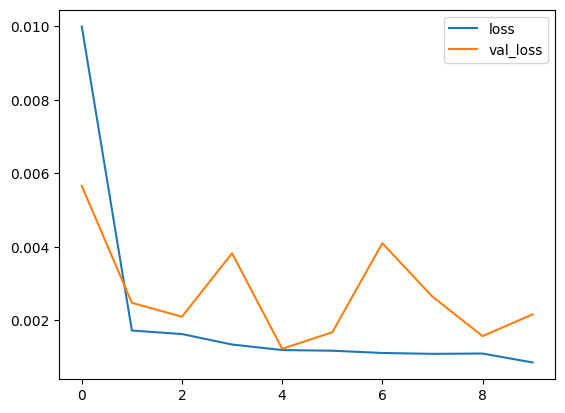

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# Predict on test data
predictions = model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [ ]:
# Inverse transform predictions
prediction_array = np.zeros((len(predictions), data.shape[1]))
prediction_array[:, 5] = predictions.reshape(-1)
predictions = scaler.inverse_transform(prediction_array)[:, 5]

In [ ]:
# Create an array of zeros with the same number of columns as the original data
y_test_array = np.zeros((len(y_test), data.shape[1]))

# Insert the scaled y_test values into the target column (column index 5)
y_test_array[:, 5] = y_test.reshape(-1)

# Inverse transform the full array and then extract the target column
y_test_rescaled = scaler.inverse_transform(y_test_array)[:, 5]


In [ ]:
# 4. Evaluate
rnn_rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f"LSTM RMSE: {rnn_rmse:.2f}")

LSTM RMSE: 169.99


In [ ]:
# Calculate R² and express as percentage accuracy
from sklearn.metrics import r2_score
r2_lstm = r2_score(y_test_rescaled, predictions)
accuracy_lstm = r2_lstm * 100
print("Test Accuracy (LSTM): {:.2f}%".format(accuracy_lstm))

Test Accuracy (LSTM): 89.42%


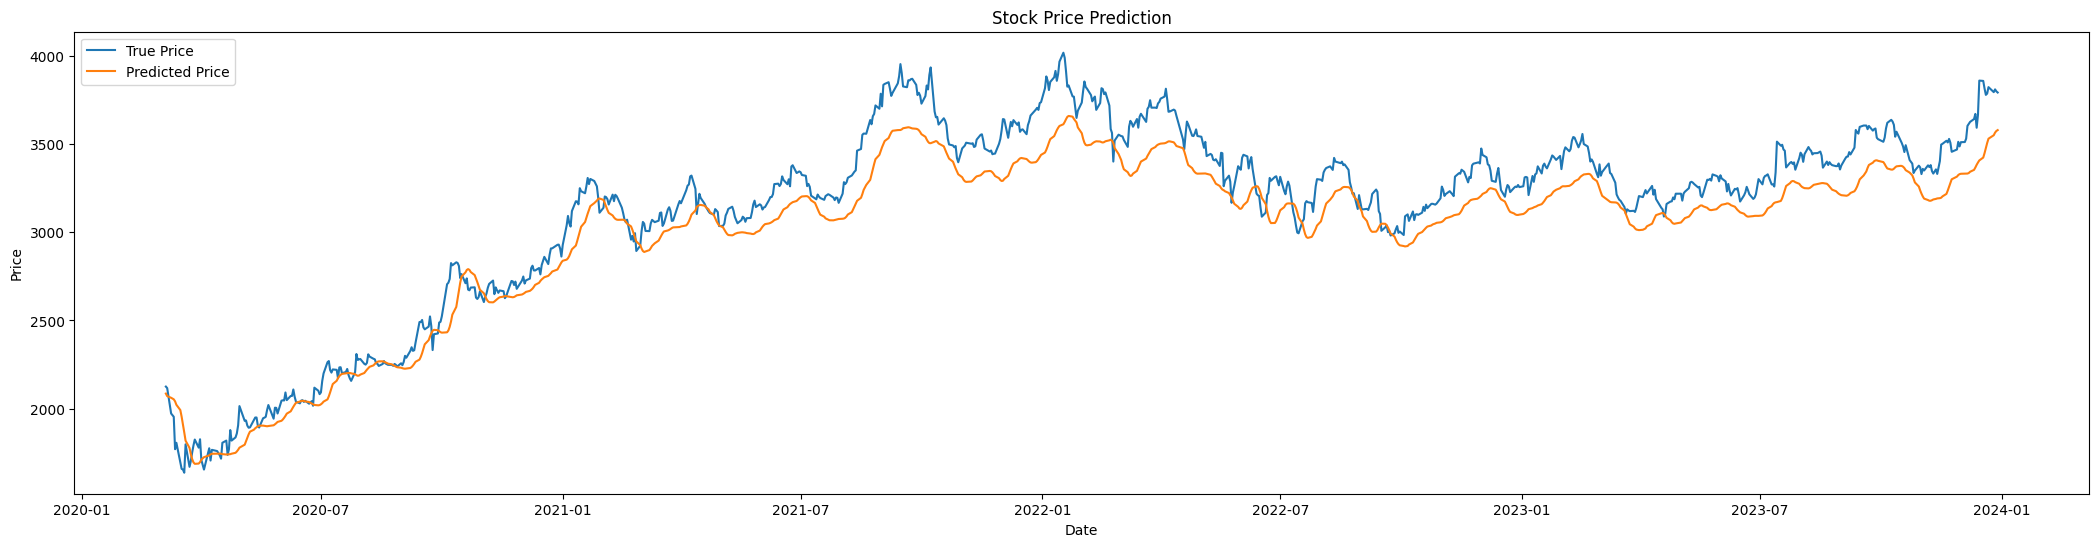

In [ ]:
# Plot results
plt.figure(figsize=(26, 6))
plt.plot(df['Date'].values[-len(y_test_rescaled):], y_test_rescaled, label='True Price')
plt.plot(df['Date'].values[-len(predictions):], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#RNN MODEL

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
# RNN Model Architecture
rnn_model = Sequential()

# First RNN layer returns sequences for the next RNN layer
rnn_model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dropout(0.3))

# Second RNN layer returns sequences
rnn_model.add(SimpleRNN(32, return_sequences=True))
rnn_model.add(Dropout(0.3))

# Final RNN layer returns single output
rnn_model.add(SimpleRNN(32, return_sequences=False))

# Output layer
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 60, 64)              │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 60, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,953 (38.88 KB)

 Trainable params: 9,953 (38.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 1. Train RNN Model
rnn_history = rnn_model.fit(X_train, y_train,
                           epochs=10,
                           batch_size=32,
                           validation_data=(X_test, y_test),
                           verbose=1)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.1976 - val_loss: 0.0382
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0136 - val_loss: 0.0407
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0069 - val_loss: 0.0274
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0048 - val_loss: 0.0287
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0038 - val_loss: 0.0215
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0031 - val_loss: 0.0170
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0029 - val_loss: 0.0224
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0024 - val_loss: 0.0190
Epoch 9/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0021 - val_loss: 0.0194
Epoch 10/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0020 - val_loss: 0.0145


<Axes: >

<Figure size 1000x600 with 0 Axes>

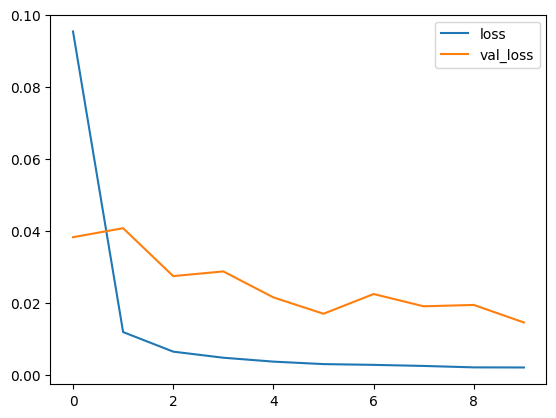

In [ ]:
plt.figure(figsize=(10,6))
pd.DataFrame(rnn_history.history).plot()

In [ ]:
# 2. Make Predictions
rnn_predictions = rnn_model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


In [ ]:
# 3. Inverse Transform
rnn_pred_array = np.zeros((len(rnn_predictions), data.shape[1]))
rnn_pred_array[:, 5] = rnn_predictions.reshape(-1)
rnn_predictions = scaler.inverse_transform(rnn_pred_array)[:, 5]

In [ ]:
# 4. Evaluate
rnn_rmse = np.sqrt(mean_squared_error(y_test_rescaled, rnn_predictions))
print(f"RNN RMSE: {rnn_rmse:.2f}")

RNN RMSE: 440.23


In [ ]:
# Calculate R² and express as percentage accuracy
from sklearn.metrics import r2_score
r2_lstm = r2_score(y_test_rescaled, rnn_predictions)
accuracy_lstm = r2_lstm * 100
print("Test Accuracy (LSTM): {:.2f}%".format(accuracy_lstm))

Test Accuracy (LSTM): 29.04%


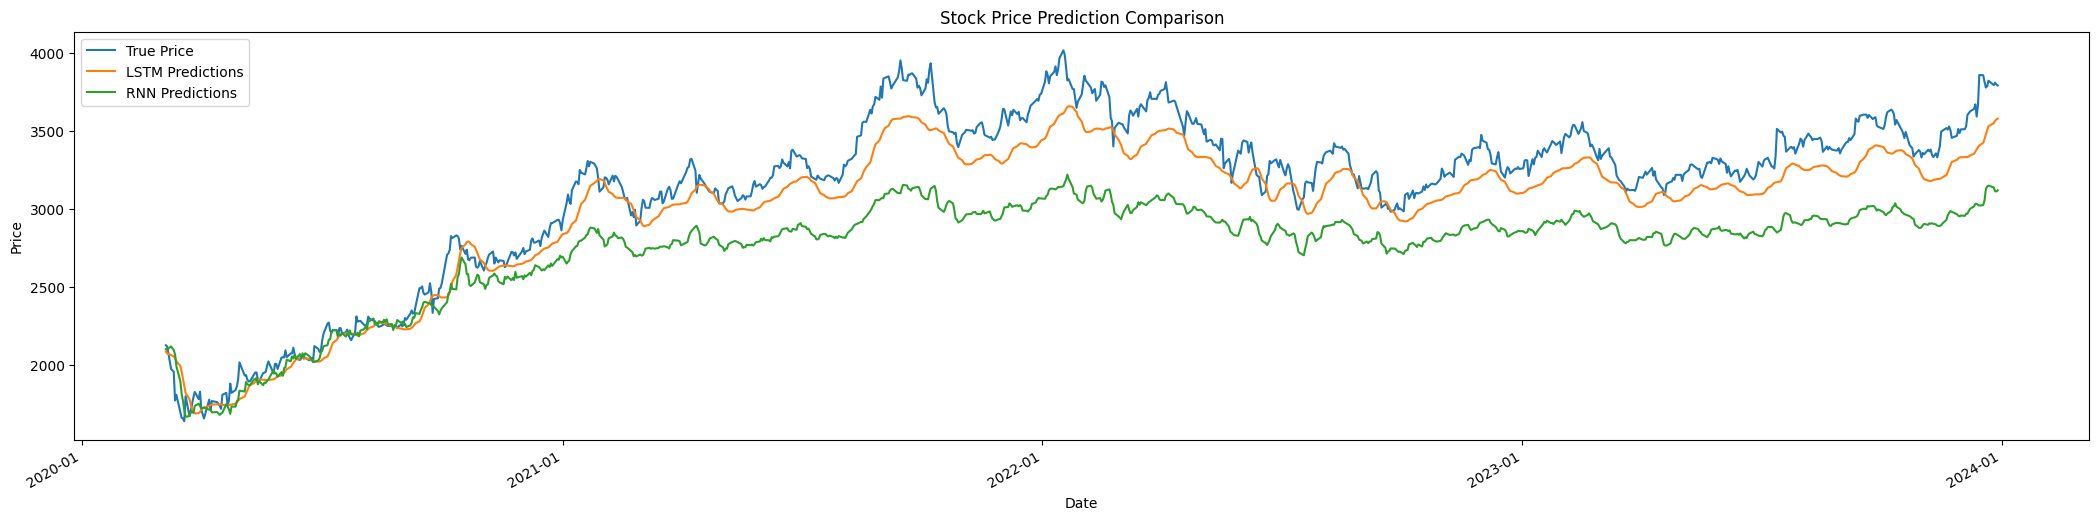

In [ ]:
# Get test period dates

import matplotlib.dates as mdates
test_dates = df['Date'].iloc[split + window_size:]

plt.figure(figsize=(26,6))
plt.plot(test_dates, y_test_rescaled, label='True Price')
plt.plot(test_dates, predictions, label='LSTM Predictions')
plt.plot(test_dates, rnn_predictions, label='RNN Predictions')

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Auto-rotate dates

plt.title('Stock Price Prediction Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#GRU MODEL

In [ ]:
from keras.layers import GRU

# GRU Model Architecture
gru_model = Sequential()
gru_model.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.3))

gru_model.add(GRU(32))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 64)              │          14,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,841 (93.13 KB)

 Trainable params: 23,841 (93.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 1. Train GRU Model
gru_history = gru_model.fit(X_train, y_train,
                           epochs=10,
                           batch_size=32,
                           validation_data=(X_test, y_test),
                           verbose=1)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - loss: 0.0230 - val_loss: 4.9794e-04
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - loss: 0.0013 - val_loss: 7.3594e-04
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 8.2068e-04 - val_loss: 0.0012
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 5.3131e-04 - val_loss: 6.8620e-04
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 4.7569e-04 - val_loss: 7.9839e-04
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 4.7041e-04 - val_loss: 0.0011
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 3.7838e-04 - val_loss: 0.0026
Epoch 9/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 3.8155e-04 - val_loss: 5.3560e-04
Epoch 10/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 3.1134e-04 - val_loss: 2.8913e-04


<Axes: >

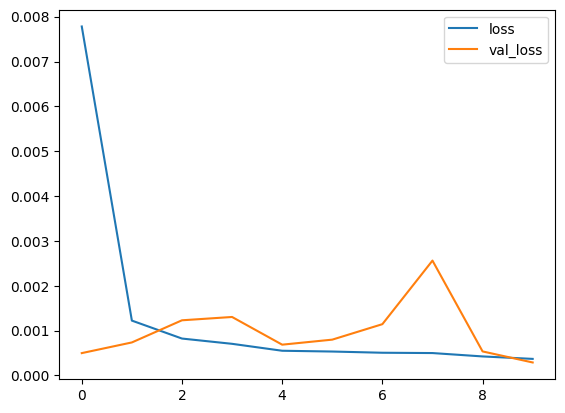

In [ ]:
pd.DataFrame(gru_history.history).plot()

In [ ]:
# 2. Make Predictions
gru_predictions = gru_model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


In [ ]:
# 3. Inverse Transform
gru_pred_array = np.zeros((len(gru_predictions), data.shape[1]))
gru_pred_array[:, 5] = gru_predictions.reshape(-1)
gru_predictions = scaler.inverse_transform(gru_pred_array)[:, 5]

In [ ]:
# 4. Evaluate
gru_rmse = np.sqrt(mean_squared_error(y_test_rescaled, gru_predictions))
print(f"GRU RMSE: {gru_rmse:.2f}")

GRU RMSE: 62.11


In [ ]:
# Calculate R² and express as percentage accuracy
from sklearn.metrics import r2_score
r2_lstm = r2_score(y_test_rescaled, gru_predictions)
accuracy_lstm = r2_lstm * 100
print("Test Accuracy (LSTM): {:.2f}%".format(accuracy_lstm))

Test Accuracy (LSTM): 98.59%


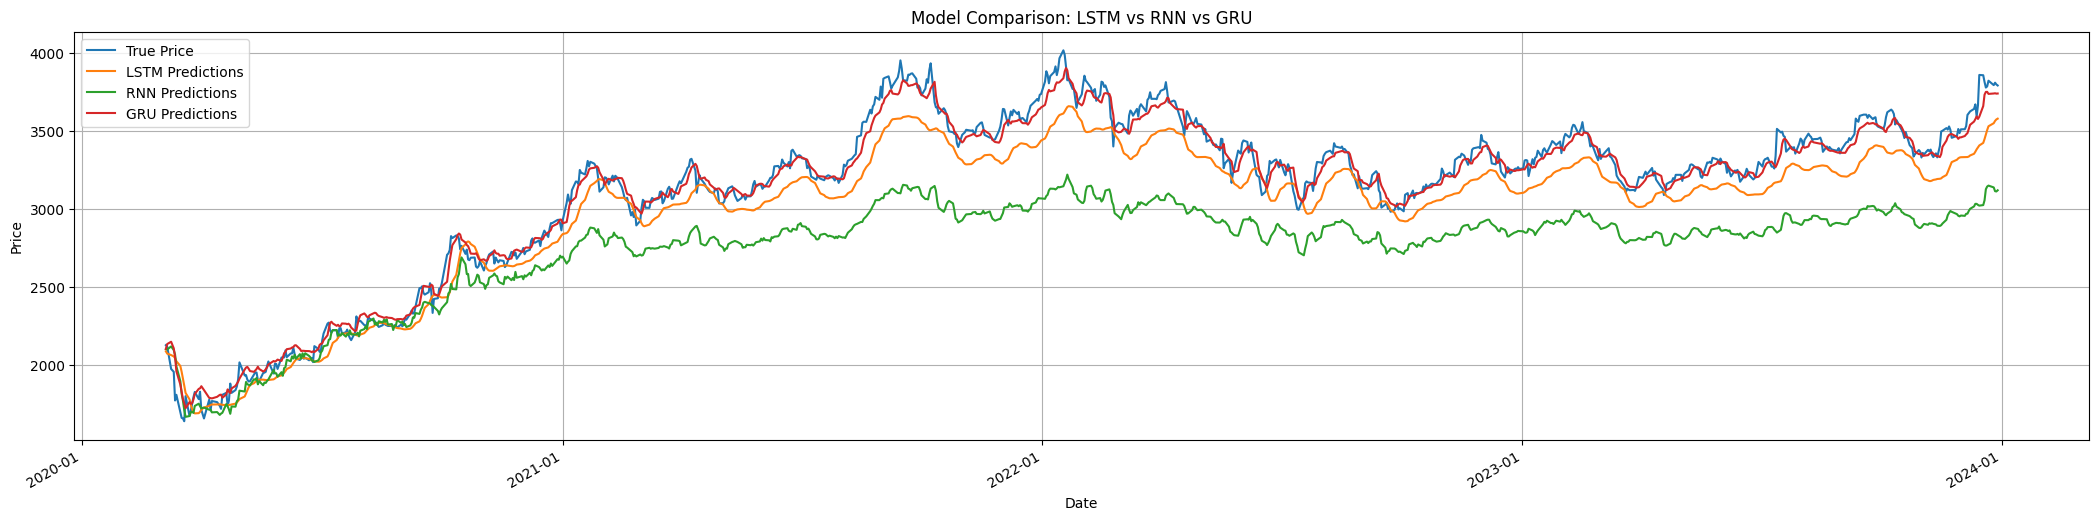

In [ ]:
# First get the test period dates
test_dates = df['Date'].iloc[split + window_size:]

# Plot with dates
plt.figure(figsize=(26,6))
plt.plot(test_dates, y_test_rescaled, label='True Price')
plt.plot(test_dates, predictions, label='LSTM Predictions')
plt.plot(test_dates, rnn_predictions, label='RNN Predictions')
plt.plot(test_dates, gru_predictions, label='GRU Predictions')

# Format date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Auto-rotate dates

plt.title('Model Comparison: LSTM vs RNN vs GRU')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate R² and express as percentage accuracy
from sklearn.metrics import r2_score
r2_lstm = r2_score(y_test_rescaled, predictions)
r2_rnn = r2_score(y_test_rescaled, rnn_predictions)
r2_gru = r2_score(y_test_rescaled, gru_predictions)

print("Test Accuracy (RNN): {:.2f}%".format(r2_rnn*100))
print("Test Accuracy (LSTM): {:.2f}%".format(r2_lstm*100))
print("Test Accuracy (GRU): {:.2f}%".format(r2_gru*100))

Test Accuracy (RNN): 29.04%
Test Accuracy (LSTM): 89.42%
Test Accuracy (GRU): 98.59%


In [ ]:
# 4. Evaluate

rnn_rmse = np.sqrt(mean_squared_error(y_test_rescaled, rnn_predictions))
print(f"RNN RMSE: {rnn_rmse:.2f}")
rnn_rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f"LSTM RMSE: {rnn_rmse:.2f}")
gru_rmse = np.sqrt(mean_squared_error(y_test_rescaled, gru_predictions))
print(f"GRU RMSE: {gru_rmse:.2f}")

RNN RMSE: 440.23
LSTM RMSE: 169.99
GRU RMSE: 62.11
